# ပီတာနှင့် ဝက်ခြံ: အပြည့်အဝ သဘာဝပတ်ဝန်းကျင်

ကျွန်တော်တို့ရဲ့အခြေအနေမှာ ပီတာဟာ မပင်ပန်းဘဲ၊ မဆာဘဲ နေရာတစ်ခုမှ နေရာတစ်ခုကို လွယ်လွယ်ကူကူ ရွှေ့လို့ရပါတယ်။ သဘာဝပတ်ဝန်းကျင်မှာ ပိုမိုလက်တွေ့ကျတဲ့အခြေအနေမှာတော့ သူဟာ အချိန်အခါကြီးမှာ ထိုင်ပြီး အနားယူဖို့လိုအပ်တယ်၊ နောက်ပြီး သူ့ကိုယ်သူ အစာစားဖို့လည်း လိုအပ်ပါတယ်။ ကျွန်တော်တို့ရဲ့ကမ္ဘာကို ပိုမိုလက်တွေ့ကျအောင် ဖန်တီးဖို့အတွက် အောက်ပါ စည်းကမ်းတွေကို အကောင်အထည်ဖော်ကြမယ်။

1. နေရာတစ်ခုမှ နေရာတစ်ခုကို ရွှေ့သွားတဲ့အခါမှာ ပီတာဟာ **စွမ်းအင်** ဆုံးရှုံးပြီး **ပင်ပန်းမှု** တိုးလာမယ်။
2. ပီတာဟာ ပန်းသီးတွေ စားခြင်းအားဖြင့် စွမ်းအင်ကို ပြန်လည်ရရှိနိုင်တယ်။
3. ပီတာဟာ သစ်ပင်အောက်မှာ ဒါမှမဟုတ် မြက်ခင်းပေါ်မှာ အနားယူခြင်းအားဖြင့် (ဥပမာ - သစ်ပင်နဲ့ မြက်ခင်းရှိတဲ့ နေရာကို လှမ်းသွားခြင်း) ပင်ပန်းမှုကို လျှော့ချနိုင်တယ်။
4. ပီတာဟာ ဝက်ခြံကို ရှာဖွေပြီး သတ်ဖို့ လိုအပ်တယ်။
5. ဝက်ခြံကို သတ်ဖို့အတွက် ပီတာဟာ သတ်မှတ်ထားတဲ့ စွမ်းအင်နဲ့ ပင်ပန်းမှု အဆင့်တွေ ရှိဖို့ လိုအပ်တယ်၊ မဟုတ်ရင် တိုက်ပွဲမှာ ရှုံးနိမ့်မယ်။


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from rlboard import *

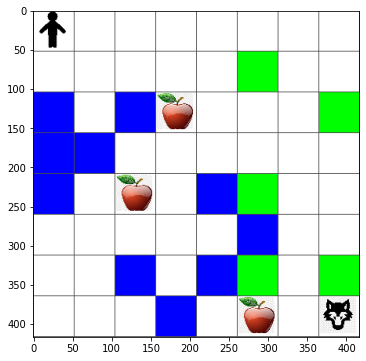

In [2]:
width, height = 8,8
m = Board(width,height)
m.randomize(seed=13)
m.plot()

In [3]:
actions = { "U" : (0,-1), "D" : (0,1), "L" : (-1,0), "R" : (1,0) }
action_idx = { a : i for i,a in enumerate(actions.keys()) }

## အခြေအနေ သတ်မှတ်ခြင်း

ကျွန်တော်တို့ရဲ့ ဂိမ်းစည်းမျဉ်းအသစ်မှာ၊ ဘုတ်အဖွဲ့ရဲ့ အခြေအနေတစ်ခုစီမှာ စွမ်းအင်နဲ့ ပင်ပန်းမှုကို ထိန်းသိမ်းထားဖို့ လိုအပ်ပါတယ်။ ဒါကြောင့် လက်ရှိ ပြဿနာအခြေအနေနှင့် ပတ်သက်သော လိုအပ်တဲ့ အချက်အလက်အားလုံး (ဘုတ်အဖွဲ့ရဲ့ အခြေအနေ၊ လက်ရှိ စွမ်းအင်နဲ့ ပင်ပန်းမှုအဆင့်များ၊ နောက်ဆုံးအခြေအနေမှာ ဝံကို အနိုင်ယူနိုင်မလား) ကို သယ်ဆောင်မယ့် `state` ဆိုတဲ့ object တစ်ခုကို ဖန်တီးပါမယ်။


In [4]:
class state:
    def __init__(self,board,energy=10,fatigue=0,init=True):
        self.board = board
        self.energy = energy
        self.fatigue = fatigue
        self.dead = False
        if init:
            self.board.random_start()
        self.update()

    def at(self):
        return self.board.at()

    def update(self):
        if self.at() == Board.Cell.water:
            self.dead = True
            return
        if self.at() == Board.Cell.tree:
            self.fatigue = 0
        if self.at() == Board.Cell.apple:
            self.energy = 10

    def move(self,a):
        self.board.move(a)
        self.energy -= 1
        self.fatigue += 1
        self.update()

    def is_winning(self):
        return self.energy > self.fatigue

In [5]:
def random_policy(state):
    return random.choice(list(actions))

def walk(board,policy):
    n = 0 # number of steps
    s = state(board)
    while True:
        if s.at() == Board.Cell.wolf:
            if s.is_winning():
                return n # success!
            else:
                return -n # failure!
        if s.at() == Board.Cell.water:
            return 0 # died
        a = actions[policy(m)]
        s.move(a)
        n+=1

walk(m,random_policy)

0

In [6]:
def print_statistics(policy):
    s,w,n = 0,0,0
    for _ in range(100):
        z = walk(m,policy)
        if z<0:
            w+=1
        elif z==0:
            n+=1
        else:
            s+=1
    print(f"Killed by wolf = {w}, won: {s} times, drown: {n} times")

print_statistics(random_policy)

Killed by wolf = 5, won: 1 times, drown: 94 times


## ဆုချီးမြှင့်မှုအလုပ်ဆောင်ပုံ

### အဓိကအကြောင်းအရာ
ဆုချီးမြှင့်မှုအလုပ်ဆောင်ပုံသည် reinforcement learning (RL) အတွက် အရေးကြီးသောအပိုင်းတစ်ခုဖြစ်သည်။ ၎င်းသည် အက်ဂျင့်တစ်ခု၏ လုပ်ဆောင်မှုများကို ညွှန်ကြားရန်နှင့် ရလဒ်များကို အကဲဖြတ်ရန် အသုံးပြုသည်။

### ဆုချီးမြှင့်မှုအလုပ်ဆောင်ပုံ၏ အရေးပါမှု
[!NOTE]  
ဆုချီးမြှင့်မှုအလုပ်ဆောင်ပုံသည် အက်ဂျင့်၏ အကျင့်ကို သက်ရောက်မှုရှိစေသည်။ အက်ဂျင့်သည် ပိုမိုကောင်းမွန်သော ဆုချီးမြှင့်မှုရရှိရန် ကြိုးစားမည်ဖြစ်သည်။

### ဆုချီးမြှင့်မှုအလုပ်ဆောင်ပုံရေးသားခြင်းအတွက် အချက်များ
1. **ရည်မှန်းချက်ကို သတ်မှတ်ပါ**  
   ဆုချီးမြှင့်မှုအလုပ်ဆောင်ပုံသည် သင်လိုချင်သော အက်ဂျင့်၏ အကျင့်ကို သက်ရောက်စေသင့်သည်။  
   ဥပမာ - @@INLINE_CODE_1@@ သည် အက်ဂျင့်ကို သတ်မှတ်ထားသော လမ်းကြောင်းအတိုင်း လိုက်နာစေသည်။

2. **ရလဒ်များကို တိုင်းတာနိုင်ရန် လွယ်ကူစေပါ**  
   ဆုချီးမြှင့်မှုသည် ရလဒ်များကို တိကျစွာ တိုင်းတာနိုင်ရန် လိုအပ်သည်။  
   ဥပမာ - @@INLINE_CODE_2@@ သည် အက်ဂျင့်၏ အောင်မြင်မှုနှုန်းကို တိုင်းတာရန် အသုံးပြုနိုင်သည်။

3. **အကျင့်ဆိုးများကို ရှောင်ရှားရန် ဆုချီးမြှင့်မှုကို သုံးပါ**  
   အက်ဂျင့်သည် မလိုလားသော အကျင့်များကို ရှောင်ရှားရန် ဆုချီးမြှင့်မှုကို သက်ဆိုင်စွာ ပြင်ဆင်ပါ။  
   ဥပမာ - @@INLINE_CODE_3@@ သည် အကျင့်ဆိုးများကို လျှော့ချရန် အကျိုးရှိသည်။

### ဆုချီးမြှင့်မှုအလုပ်ဆောင်ပုံ၏ အမျိုးအစားများ
1. **Positive Rewards**  
   အက်ဂျင့်၏ အကျင့်ကောင်းများကို အားပေးရန် အသုံးပြုသည်။  
   ဥပမာ - "အက်ဂျင့်သည် @@INLINE_CODE_4@@ ကို ပြည့်စုံစွာ လိုက်နာသောအခါ ဆုချီးမြှင့်ပါ။"

2. **Negative Rewards**  
   အက်ဂျင့်၏ အကျင့်မကောင်းများကို လျှော့ချရန် အသုံးပြုသည်။  
   ဥပမာ - "အက်ဂျင့်သည် @@INLINE_CODE_5@@ ကို မလိုက်နာသောအခါ ဒဏ်ပေးပါ။"

3. **Sparse Rewards**  
   အက်ဂျင့်သည် သတ်မှတ်ထားသော ရည်မှန်းချက်ကို ပြည့်မီသောအခါတွင်သာ ဆုချီးမြှင့်သည်။  
   ဥပမာ - "အက်ဂျင့်သည် @@INLINE_CODE_6@@ ကို ပြည့်မီသောအခါတွင်သာ ဆုချီးမြှင့်ပါ။"

### သင့်အတွက် အကြံပြုချက်များ
[!TIP]  
- ဆုချီးမြှင့်မှုအလုပ်ဆောင်ပုံကို ရိုးရှင်းပြီး ရှင်းလင်းစွာ ရေးသားပါ။  
- အက်ဂျင့်၏ အကျင့်ကို သက်ရောက်မှုရှိစေရန် ဆုချီးမြှင့်မှုကို သေချာစွာ ပြင်ဆင်ပါ။  
- @@CODE_BLOCK_1@@ ကို အသုံးပြု၍ သင့်ဆုချီးမြှင့်မှုအလုပ်ဆောင်ပုံကို စမ်းသပ်ပါ။

### သင့်ဆုချီးမြှင့်မှုအလုပ်ဆောင်ပုံကို တိုးတက်စေရန်
[!IMPORTANT]  
ဆုချီးမြှင့်မှုအလုပ်ဆောင်ပုံသည် အက်ဂျင့်၏ အကျင့်ကို သက်ရောက်မှုရှိစေရန် အဓိကဖြစ်သည်။ သင့်ရည်မှန်းချက်နှင့် ကိုက်ညီသော ဆုချီးမြှင့်မှုကို သေချာစွာ ရေးသားပါ။


In [7]:
def reward(s):
    r = s.energy-s.fatigue
    if s.at()==Board.Cell.wolf:
        return 100 if s.is_winning() else -100
    if s.at()==Board.Cell.water:
        return -100
    return r

## Q-Learning algorithm

အမှန်တကယ် လေ့လာမှု အယ်လဂိုရီသမ်မှာ မည်သို့မှ မပြောင်းလဲပါဘူး၊ ကျွန်တော်တို့က `state` ကို အသုံးပြုပြီး သာမန် board position အစား သုံးသွားတာပါ။


In [8]:
Q = np.ones((width,height,len(actions)),dtype=np.float)*1.0/len(actions)

In [9]:
def probs(v,eps=1e-4):
    v = v-v.min()+eps
    v = v/v.sum()
    return v

In [10]:

from IPython.display import clear_output

lpath = []

for epoch in range(10000):
    clear_output(wait=True)
    print(f"Epoch = {epoch}",end='')

    # Pick initial point
    s = state(m)
    
    # Start travelling
    n=0
    cum_reward = 0
    while True:
        x,y = s.board.human
        v = probs(Q[x,y])
        while True:
            a = random.choices(list(actions),weights=v)[0]
            dpos = actions[a]
            if s.board.is_valid(s.board.move_pos(s.board.human,dpos)):
                break 
        s.move(dpos)
        r = reward(s)
        if abs(r)==100: # end of game
            print(f" {n} steps",end='\r')
            lpath.append(n)
            break
        alpha = np.exp(-n / 3000)
        gamma = 0.5
        ai = action_idx[a]
        Q[x,y,ai] = (1 - alpha) * Q[x,y,ai] + alpha * (r + gamma * Q[x+dpos[0], y+dpos[1]].max())
        n+=1

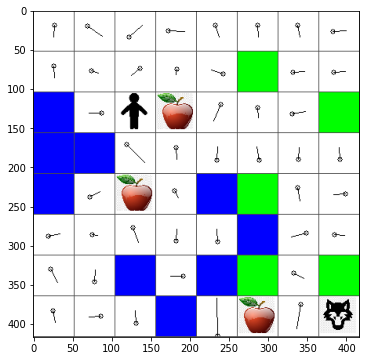

In [11]:
m.plot(Q)

## ရလဒ်များ

ပီတာကို ဝံပုလွေကိုတိုက်ခိုက်နိုင်အောင် လေ့ကျင့်ပေးတာ အောင်မြင်ခဲ့ရဲ့လားဆိုတာ ကြည့်ကြရအောင်!


In [12]:
def qpolicy(m):
        x,y = m.human
        v = probs(Q[x,y])
        a = random.choices(list(actions),weights=v)[0]
        return a

print_statistics(qpolicy)

Killed by wolf = 1, won: 9 times, drown: 90 times


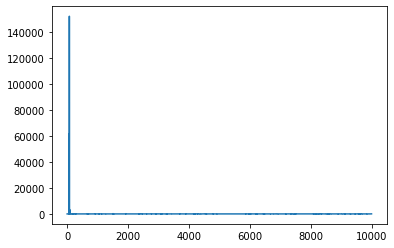

In [13]:
plt.plot(lpath)


---

**ဝက်ဘ်ဆိုက်မှတ်ချက်**:  
ဤစာရွက်စာတမ်းကို AI ဘာသာပြန်ဝန်ဆောင်မှု [Co-op Translator](https://github.com/Azure/co-op-translator) ကို အသုံးပြု၍ ဘာသာပြန်ထားပါသည်။ ကျွန်ုပ်တို့သည် တိကျမှန်ကန်မှုအတွက် ကြိုးစားနေသော်လည်း၊ အလိုအလျောက်ဘာသာပြန်ဆိုမှုများတွင် အမှားများ သို့မဟုတ် မတိကျမှုများ ပါဝင်နိုင်သည်ကို ကျေးဇူးပြု၍ သတိပြုပါ။ မူရင်းဘာသာစကားဖြင့် ရေးသားထားသော စာရွက်စာတမ်းကို အာဏာတည်သော ရင်းမြစ်အဖြစ် သတ်မှတ်သင့်ပါသည်။ အရေးကြီးသော အချက်အလက်များအတွက် လူက ဘာသာပြန်ဆိုမှုကို အသုံးပြုရန် အကြံပြုပါသည်။ ဤဘာသာပြန်ကို အသုံးပြုခြင်းမှ ဖြစ်ပေါ်လာသော နားလည်မှုမှားများ သို့မဟုတ် အဓိပ္ပါယ်မှားများအတွက် ကျွန်ုပ်တို့သည် တာဝန်မယူပါ။
